Introducción y desarrollo del proyecto

Proyecto: Movilidad Urbana en Chicago
    
El objetivo principal de este análisis es realizar un análisis exploratorio de datos (EDA) con el fin de identificar patrones relevantes, comprender la distribución de los viajes entre diferentes compañías de taxis y zonas de destino, así como analizar aspectos específicos como la duración de los trayectos en función de las condiciones meteorológicas.

El desarrollo se divide en dos partes principales:

Análisis exploratorio de datos (EDA): En esta sección se buscará comprender las principales características de los datos, corregir posibles errores, verificar los tipos de datos y realizar visualizaciones que nos ayuden a extraer conclusiones significativas.

Prueba de hipótesis: Se evaluará si las condiciones climáticas (específicamente los sábados lluviosos) afectan la duración promedio de los viajes desde el Loop hasta el aeropuerto O'Hare, usando métodos estadísticos apropiados.

Con este enfoque, esperamos obtener información relevante que podría ser de gran utilidad para operadores de taxis, urbanistas o responsables de la movilidad urbana de la ciudad de Chicago.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df_1 = pd.read_csv('/datasets/project_sql_result_01.csv')
print(df_1)

                       company_name  trips_amount
0                         Flash Cab         19558
1         Taxi Affiliation Services         11422
2                 Medallion Leasing         10367
3                        Yellow Cab          9888
4   Taxi Affiliation Service Yellow          9299
..                              ...           ...
59     4053 - 40193 Adwar H. Nikola             7
60          2733 - 74600 Benny Jona             7
61    5874 - 73628 Sergey Cab Corp.             5
62       2241 - 44667 - Felman Corp             3
63      3556 - 36214 RC Andrews Cab             2

[64 rows x 2 columns]


In [3]:
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


In [4]:
print(df_1.isna().sum())

company_name    0
trips_amount    0
dtype: int64


In [5]:
print(df_1.duplicated().sum())

0


Observaciones:

Al hacer exploracion en el data frame 1 se observo que los tipos de datos son los correctos al tener un tipo "object" en el nombre de la empresa y un dato de tipo entero en el numero de viajes de cada compañia que tambien coincide con el tipo de dato correcto y no se encontraron valores nulos ni duplicados.

In [6]:
df_4 = pd.read_csv('/datasets/project_sql_result_04.csv')
print(df_4)

   dropoff_location_name  average_trips
0                   Loop   10727.466667
1            River North    9523.666667
2          Streeterville    6664.666667
3              West Loop    5163.666667
4                 O'Hare    2546.900000
..                   ...            ...
89       Mount Greenwood       3.137931
90             Hegewisch       3.117647
91              Burnside       2.333333
92             East Side       1.961538
93             Riverdale       1.800000

[94 rows x 2 columns]


In [7]:
print(df_4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [8]:
print(df_4.isna().sum())

dropoff_location_name    0
average_trips            0
dtype: int64


In [9]:
print(df_4.duplicated().sum())

0


Observaciones: 

Analizando el tipo del datos del segundo dataframe se obseva que tambien coincide con el tipo de datos correctom tiendo un dato tipo "object" en el nombre de los barrios de chicago donde terminaron los viajes y un flotante en el promedio de viajes el cual tambien coincide con el tipo de datos ya que incluye un decimal. En este data frame tampoco se encontraron valores nulos ni duplicados.

los 10 principales barrios en términos de finalización del recorrido

In [10]:
top_10_barrios = df_4.sort_values(by='average_trips', ascending=False).head(10)


print(top_10_barrios)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


Empresas de taxis vs número de viajes 

In [11]:
top_empresas = df_1.sort_values(by='trips_amount', ascending=False).head(40)
print(top_empresas)

                               company_name  trips_amount
0                                 Flash Cab         19558
1                 Taxi Affiliation Services         11422
2                         Medallion Leasing         10367
3                                Yellow Cab          9888
4           Taxi Affiliation Service Yellow          9299
5                 Chicago Carriage Cab Corp          9181
6                              City Service          8448
7                                  Sun Taxi          7701
8                 Star North Management LLC          7455
9         Blue Ribbon Taxi Association Inc.          5953
10                  Choice Taxi Association          5015
11                               Globe Taxi          4383
12                Dispatch Taxi Affiliation          3355
13                Nova Taxi Affiliation Llc          3175
14  Patriot Taxi Dba Peace Taxi Association          2235
15                 Checker Taxi Affiliation          2216
16            

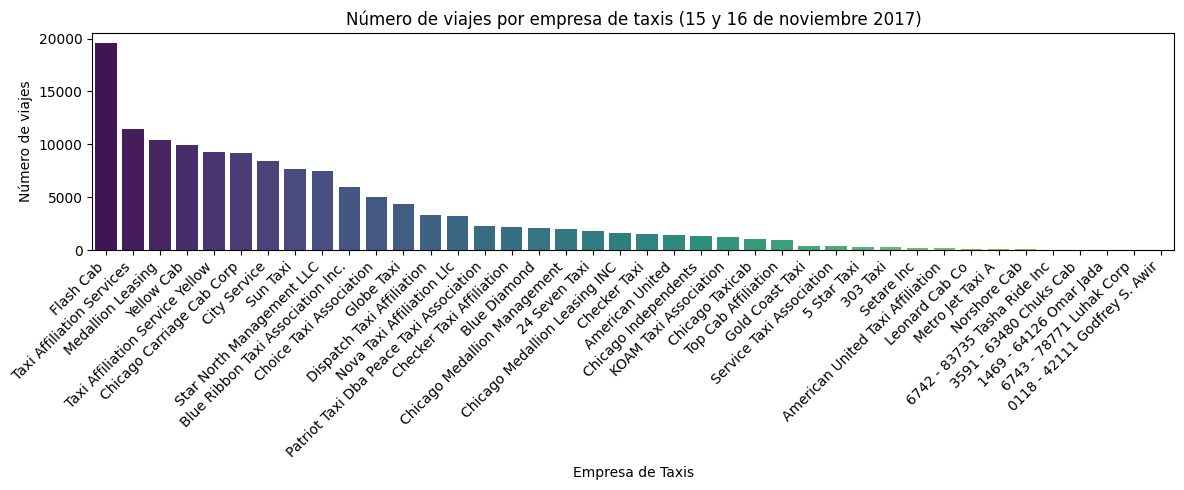

In [13]:
top_empresas = df_1.sort_values(by='trips_amount', ascending=False).head(40)


plt.figure(figsize=(12, 5))
sns.barplot(data=top_empresas, x='company_name', y='trips_amount', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Número de viajes por empresa de taxis (15 y 16 de noviembre 2017)')
plt.xlabel('Empresa de Taxis')
plt.ylabel('Número de viajes')
plt.tight_layout()
plt.show()

Analisis

AL obervar la tabla de empresas de taxis y número de viajes se puede observar principalmente los siguientes aspectos:


-Flash Cab lidera con diferencia ya que  realizó 8,100 viajes más que la segunda empresa.(Taxi Affiliation Services)

-Hay varios empresas afiliadas con nombres similares, lo que podría indicar conglomerados o marcas compartidas (por ejemplo, "Taxi Affiliation").

-Las 5 empresas más activas representan un volumen muy alto del total de viajes, lo que sugiere una concentración del mercado y que la gente no cambia su preferencia por esas empresas ya que hay una diferencia notable de 19558 viajes de la empresa  Flash Cab a 33 de la empresa Godfrey S. Awir.

-Las empresas con menos de 1,000 viajes son numerosas , lo que muestra que hay un gran numero de taxis y operadores con baja actividad.

In [14]:
top_10_barrios = df_4.sort_values(by='average_trips', ascending=False).head(10)

print(top_10_barrios)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


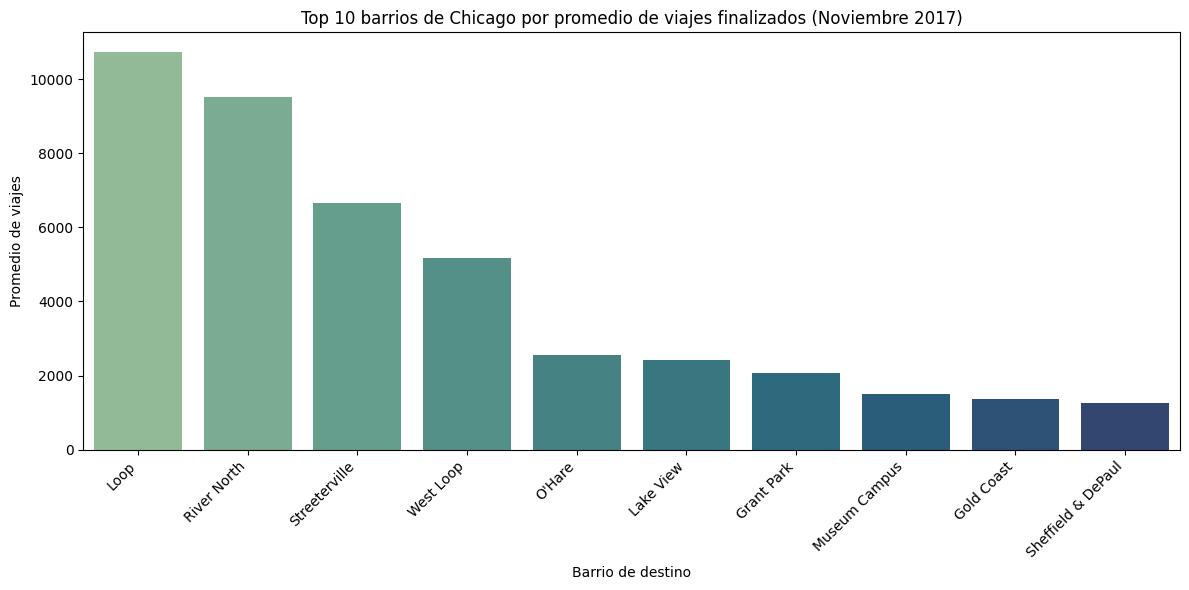

In [15]:
top_10_barrios = df_4.sort_values(by='average_trips', ascending=False).head(10)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_barrios, x='dropoff_location_name', y='average_trips', palette='crest')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 barrios de Chicago por promedio de viajes finalizados (Noviembre 2017)')
plt.xlabel('Barrio de destino')
plt.ylabel('Promedio de viajes')
plt.tight_layout()
plt.show()

Analisis: 


Al observas la grafica de los 10 barrios principales por número de finalizaciones se puede observar lo siguiente:

-La empresa lidera Loop  con más de 321,000 viajes estimados en el mes.

-Le siguen River North y Streeterville, todos en áreas céntricas o de alto tráfico, lo que refleja alta demanda en zonas urbanas y comerciales.

-El Aeropuerto O'Hare aparece de nuevo en el top 5, así que se puede notar  su importancia como destino frecuente de taxis, especialmente para conexiones aéreas.


A medida que bajamos en la lista, los barrios tienen un tráfico más moderado, pero aún significativo (más de 37,000 viajes estimados) a diferencia de la grafica de empresas de taxis y número de viajes en la cual el cambio si es más notorio.

Paso 5  Prueba de hipótesis

In [16]:
df_7 = pd.read_csv('/datasets/project_sql_result_07.csv')
print(df_7.sample(10))

                 start_ts weather_conditions  duration_seconds
1062  2017-11-11 06:00:00               Good            1500.0
881   2017-11-25 11:00:00               Good            1800.0
355   2017-11-11 16:00:00               Good            2400.0
278   2017-11-18 06:00:00               Good            1380.0
917   2017-11-18 05:00:00               Good            1568.0
999   2017-11-04 10:00:00               Good            2114.0
295   2017-11-18 15:00:00               Good            3660.0
748   2017-11-04 09:00:00               Good            1843.0
639   2017-11-25 16:00:00               Good            2091.0
523   2017-11-18 06:00:00               Good            1260.0


In [17]:
print(df_7.info)

<bound method DataFrame.info of                  start_ts weather_conditions  duration_seconds
0     2017-11-25 16:00:00               Good            2410.0
1     2017-11-25 14:00:00               Good            1920.0
2     2017-11-25 12:00:00               Good            1543.0
3     2017-11-04 10:00:00               Good            2512.0
4     2017-11-11 07:00:00               Good            1440.0
...                   ...                ...               ...
1063  2017-11-25 11:00:00               Good               0.0
1064  2017-11-11 10:00:00               Good            1318.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0
1067  2017-11-04 16:00:00                Bad            2834.0

[1068 rows x 3 columns]>


In [18]:
print(df_7.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


In [19]:
df_7['start_ts'] = pd.to_datetime(df_7['start_ts'], format='%Y-%m-%d')

print(df_7.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB
None


In [20]:
print(df_7.isna().sum())

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


In [21]:
print(df_7.duplicated().sum())

197


In [22]:
print(df_7.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
1063    False
1064    False
1065     True
1066     True
1067    False
Length: 1068, dtype: bool


In [23]:
df_7.iloc[1065:1067]

,start_ts,weather_conditions,duration_seconds
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


Observaciones:  Se cambio el tipo de dato de la columna " start_ts" de onject a "datatime" ya que es una fecha. Se encontraron 197 datos duplicados, sin embargo no fueron eliminados  ya que pertenecen al musmo dia de fecha (en donde se encuentran los valores duplicados) pero con diferente condicion de clima y duración de segundos.

Hipotesis Nula y alternativa

H₀ (nula):
No hay diferencia en la duración promedio de los viajes entre sábados con clima "Good" y "Bad".

H₁ (alternativa):
Sí hay una diferencia en la duración promedio entre ambos tipos de clima.                                                                                                   

In [24]:
df_7['start_ts'] = pd.to_datetime(df_7['start_ts'], errors='coerce')

In [25]:
df_7 = df_7[df_7['start_ts'].notna()]


df_sabados = df_7[df_7['start_ts'].dt.day_name() == 'Saturday']

In [26]:

df_sabados = df_7[df_7['start_ts'].dt.day_name() == 'Saturday']


lluviosos = df_sabados[df_sabados['weather_conditions'].str.contains('rain', case=False)]
no_lluviosos = df_sabados[~df_sabados['weather_conditions'].str.contains('rain', case=False)]


dur_lluviosos = lluviosos['duration_seconds']
dur_no_lluviosos = no_lluviosos['duration_seconds']

In [27]:
buen_clima = df_sabados[df_sabados['weather_conditions'] == 'Good']
mal_clima = df_sabados[df_sabados['weather_conditions'] == 'Bad']

# Duraciones sin nulos
dur_buen_clima = buen_clima['duration_seconds'].dropna()
dur_mal_clima = mal_clima['duration_seconds'].dropna()

# Prueba t
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(dur_buen_clima, dur_mal_clima, equal_var=False)

print(f'Estadístico t: {stat:.2f}')
print(f'Valor p: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: la duración promedio SÍ cambia según el clima.")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia suficiente de cambio en la duración.")

Estadístico t: -7.19
Valor p: 0.0000
Rechazamos la hipótesis nula: la duración promedio SÍ cambia según el clima.


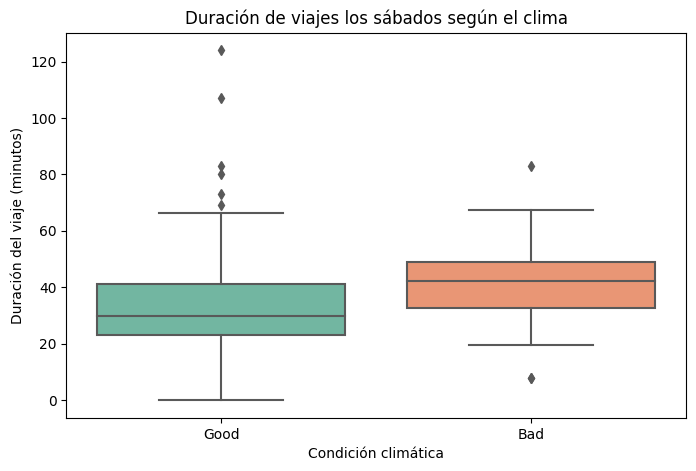

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear dataframe auxiliar para graficar
df_viz = df_sabados[df_sabados['weather_conditions'].isin(['Good', 'Bad'])].copy()
df_viz['duration_min'] = df_viz['duration_seconds'] / 60  # convertir a minutos

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_viz, x='weather_conditions', y='duration_min', palette='Set2')
plt.title('Duración de viajes los sábados según el clima')
plt.xlabel('Condición climática')
plt.ylabel('Duración del viaje (minutos)')
plt.show()

Analisis de la hipotesis:  Al hacer el analisis de la hipotesis y la grafia se puede notar que  La duración promedio de los viajes desde el Loop hasta O’Hare cambia los sábados con mal clima. Además,  Basándonos en una prueba t de Student con un nivel de significancia de 0.05, encontramos que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O’Hare sí cambia significativamente los sábados con mal clima.

El valor p < 0.0001 indica que esta diferencia no se debe al azar.
El clima adverso probablemente afecta el tráfico o las condiciones de manejo, resultando en viajes más largos.